# Analyse météorologique - Projet Data Science ESEO E3e

Ce notebook contient les étapes d'analyse exploratoire des données météo horaires pour trois départements : 05, 21 et 29.  
Les données ont été nettoyées en amont dans le dossier `clean_data/`.

---

## Imports

On importe les bibliothèques nécessaires à l’analyse (Pandas, Numpy, Seaborn, etc.).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os, sys

sns.set_theme(style="whitegrid")

---
## Positionnement du répertoire racine

Ce bloc permet d'assurer que le notebook est exécuté depuis la **racine du projet**, même s'il est physiquement dans un sous-dossier (`notebooks/`).

In [2]:
if 'project_root' not in globals():
    project_root = os.path.abspath("..")
    os.chdir(project_root)
    sys.path.append(project_root)

---
## Chargement des données nettoyées

Les fichiers nettoyés ont été prétraités avec `scripts/nettoyage.py`.  
On les charge ici dans un DataFrame unique par département trié selon la date.

In [3]:
df_05 = pd.concat([
    pd.read_csv(os.path.join("clean_data", "05", file), parse_dates=['datetime']) for file in os.listdir(os.path.join("clean_data", "05"))
]).sort_values("datetime").reset_index(drop=True)

In [4]:
df_21 = pd.concat([
    pd.read_csv(os.path.join("clean_data", "21", file), parse_dates=['datetime']) for file in os.listdir(os.path.join("clean_data", "21"))
]).sort_values("datetime").reset_index(drop=True)

In [5]:
df_29 = pd.concat([
    pd.read_csv(os.path.join("clean_data", "29", file), parse_dates=['datetime']) for file in os.listdir(os.path.join("clean_data", "29"))
]).sort_values("datetime").reset_index(drop=True)

---
## Carte interactive des stations météo

Nous affichons ici les stations météo ayant contribué aux données, avec la valeur moyenne par station pour les différentes variables utilisés.

In [6]:
from scripts.utils import extraire_points
from scripts.cartes import generer_carte_stations, afficher_carte_iframe

df_05["département"] = "05"
df_21["département"] = "21"
df_29["département"] = "29"
df_all = pd.concat([df_05, df_21, df_29])

points = extraire_points(df_all, variables=["T", "U", "FF", "RR1", "N"])
carte = generer_carte_stations(points, variables=["T", "U", "FF", "RR1", "N"])
afficher_carte_iframe(carte, width='50%', height='600px')

---
## Inspection des données

On vérifie que les types de colonnes sont corrects, qu’il n’y a pas de valeurs manquantes critiques, et que les plages temporelles sont cohérentes.

In [ ]:
print(df_05.info())
print()
print(df_05.isna().sum())
print()
print(f'{df_05["datetime"].min()}, {df_05["datetime"].max()}')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4063559 entries, 0 to 4063558
Data columns (total 11 columns):
 #   Column       Dtype         
---  ------       -----         
 0   datetime     datetime64[ns]
 1   T            float64       
 2   U            float64       
 3   FF           float64       
 4   RR1          float64       
 5   N            float64       
 6   LAT          float64       
 7   LON          float64       
 8   NUM_POSTE    int64         
 9   NOM_USUEL    object        
 10  département  object        
dtypes: datetime64[ns](1), float64(7), int64(1), object(2)
memory usage: 341.0+ MB
None

datetime             0
T               191441
U               687459
FF              791081
RR1            1060046
N              4025833
LAT                  0
LON                  0
NUM_POSTE            0
NOM_USUEL            0
département          0
dtype: int64

2000-01-01 00:00:00, 2025-05-28 03:00:00


In [ ]:
print(df_21.info())
print()
print(df_21.isna().sum())
print()
print(f'{df_21["datetime"].min()}, {df_21["datetime"].max()}')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3610605 entries, 0 to 3610604
Data columns (total 11 columns):
 #   Column       Dtype         
---  ------       -----         
 0   datetime     datetime64[ns]
 1   T            float64       
 2   U            float64       
 3   FF           float64       
 4   RR1          float64       
 5   N            float64       
 6   LAT          float64       
 7   LON          float64       
 8   NUM_POSTE    int64         
 9   NOM_USUEL    object        
 10  département  object        
dtypes: datetime64[ns](1), float64(7), int64(1), object(2)
memory usage: 303.0+ MB
None

datetime             0
T               143701
U              1585113
FF             2153227
RR1             173665
N              3464883
LAT                  0
LON                  0
NUM_POSTE            0
NOM_USUEL            0
département          0
dtype: int64

2000-01-01 00:00:00, 2025-05-28 03:00:00


In [ ]:
print(df_29.info())
print()
print(df_29.isna().sum())
print()
print(f'{df_29["datetime"].min()}, {df_29["datetime"].max()}')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4626791 entries, 0 to 4626790
Data columns (total 11 columns):
 #   Column       Dtype         
---  ------       -----         
 0   datetime     datetime64[ns]
 1   T            float64       
 2   U            float64       
 3   FF           float64       
 4   RR1          float64       
 5   N            float64       
 6   LAT          float64       
 7   LON          float64       
 8   NUM_POSTE    int64         
 9   NOM_USUEL    object        
 10  département  object        
dtypes: datetime64[ns](1), float64(7), int64(1), object(2)
memory usage: 388.3+ MB
None

datetime             0
T               567282
U              1308818
FF             1007317
RR1             608163
N              3646729
LAT                  0
LON                  0
NUM_POSTE            0
NOM_USUEL            0
département          0
dtype: int64

2000-01-01 00:00:00, 2025-05-28 03:00:00


---
## Statistiques de base

Pour chaque variable, on calcule les indicateurs descriptifs classiques : min, max, médiane, moyenne, écart-type…


In [7]:
from scripts.utils import statistiques_base

In [8]:

for col in ["T", "U", "FF", "RR1", "N"]:
    print(f"Statistiques pour {col} :")
    print(str(statistiques_base(df_05[col].dropna())).replace("'", '')[1:-1])

Statistiques pour T :
min: -29.2, Q1: 0.5, médiane: 6.6, Q3: 13.4, max: 41.0, moyenne: 7.20956259597461, écart-type: 9.3589906916337, écart-type relatif: 129.81357144827624
Statistiques pour U :
min: 1.0, Q1: 48.0, médiane: 69.0, Q3: 87.0, max: 100.0, moyenne: 66.17126625396168, écart-type: 23.09089160034448, écart-type relatif: 34.89564717066605
Statistiques pour FF :
min: 0.0, Q1: 0.8, médiane: 1.6, Q3: 3.1, max: 36.0, moyenne: 2.1893267731670023, écart-type: 2.0596658222967807, écart-type relatif: 94.07758803028482
Statistiques pour RR1 :
min: 0.0, Q1: 0.0, médiane: 0.0, Q3: 0.0, max: 60.7, moyenne: 0.09460411857714626, écart-type: 0.5801021054670787, écart-type relatif: 613.1890600450193
Statistiques pour N :
min: 0.0, Q1: 1.0, médiane: 4.0, Q3: 8.0, max: 9.0, moyenne: 4.219106186714733, écart-type: 3.307316099436752, écart-type relatif: 78.38902253398939


In [9]:
for col in ["T", "U", "FF", "RR1", "N"]:
    print(f"Statistiques pour {col} :")
    print(str(statistiques_base(df_21[col].dropna())).replace("'", '')[1:-1])

Statistiques pour T :
min: -23.4, Q1: 5.2, médiane: 10.5, Q3: 16.3, max: 42.0, moyenne: 10.906740365467291, écart-type: 7.882994868027632, écart-type relatif: 72.27635942436676
Statistiques pour U :
min: 10.0, Q1: 66.0, médiane: 83.0, Q3: 94.0, max: 100.0, moyenne: 78.04269728046322, écart-type: 18.387379990478067, écart-type relatif: 23.56066695695955
Statistiques pour FF :
min: 0.0, Q1: 1.7, médiane: 3.0, Q3: 4.3, max: 21.5, moyenne: 3.1850729186250932, écart-type: 2.1331794992803226, écart-type relatif: 66.97427511961504
Statistiques pour RR1 :
min: 0.0, Q1: 0.0, médiane: 0.0, Q3: 0.0, max: 71.8, moyenne: 0.09384670666348553, écart-type: 0.527130131941039, écart-type relatif: 561.6927334820776
Statistiques pour N :
min: 0.0, Q1: 6.0, médiane: 8.0, Q3: 8.0, max: 9.0, moyenne: 6.523915400557225, écart-type: 2.4769303682521437, écart-type relatif: 37.96692961470013


In [10]:
for col in ["T", "U", "FF", "RR1", "N"]:
    print(f"Statistiques pour {col} :")
    print(str(statistiques_base(df_29[col].dropna())).replace("'", '')[1:-1])

Statistiques pour T :
min: -9.0, Q1: 8.8, médiane: 11.9, Q3: 15.3, max: 41.0, moyenne: 11.952310168544996, écart-type: 4.967071783453213, écart-type relatif: 41.557420393298536
Statistiques pour U :
min: 2.0, Q1: 76.0, médiane: 87.0, Q3: 94.0, max: 100.0, moyenne: 83.84667174808234, écart-type: 12.945951441745605, écart-type relatif: 15.440030202560415
Statistiques pour FF :
min: 0.0, Q1: 2.8, médiane: 4.5, Q3: 7.0, max: 42.0, moyenne: 5.223563865909798, écart-type: 3.459005654779214, écart-type relatif: 66.21926607145546
Statistiques pour RR1 :
min: 0.0, Q1: 0.0, médiane: 0.0, Q3: 0.0, max: 42.0, moyenne: 0.11872084203862601, écart-type: 0.5266030984135077, écart-type relatif: 443.5641538342329
Statistiques pour N :
min: 0.0, Q1: 5.0, médiane: 7.0, Q3: 8.0, max: 9.0, moyenne: 6.246181364036153, écart-type: 2.37613639328019, écart-type relatif: 38.0414249090068


---
## Température : évolution mensuelle

On observe ici l’évolution de la température moyenne mensuelle entre 2000 et 2025 pour les trois départements étudiés. Cela permet de visualiser les tendances saisonnières et les différences climatiques régionales.\
On utilise ici une agrégation mensuelle (via `resample("ME").mean()`) pour lisser les données horaires trop nombreuses.

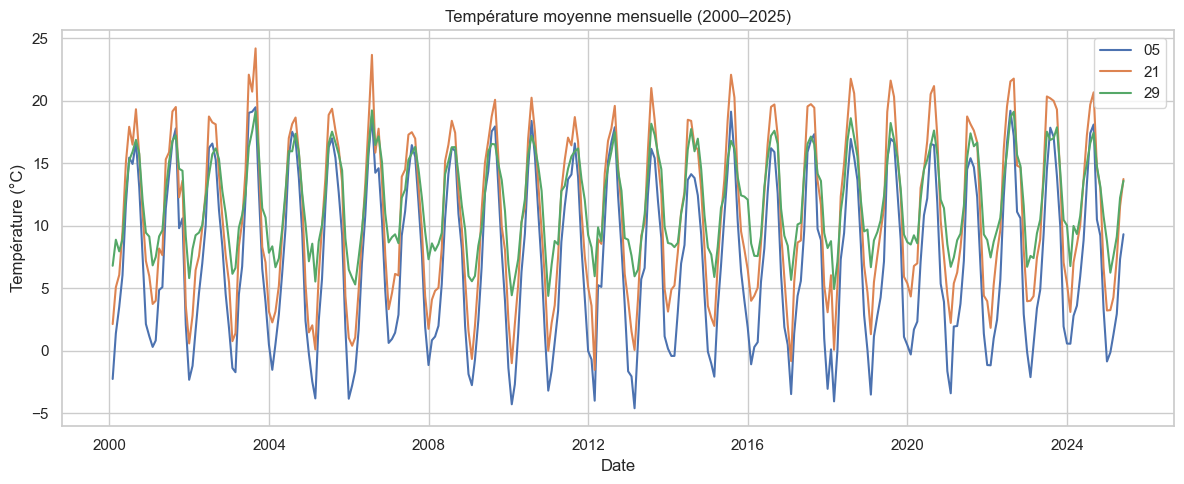

In [14]:
from scripts.utils import resample_mensuel

plt.figure(figsize=(12, 5))
plt.plot(resample_mensuel(df_05, "T"), label="05")
plt.plot(resample_mensuel(df_21, "T"), label="21")
plt.plot(resample_mensuel(df_29, "T"), label="29")
plt.title("Température moyenne mensuelle (2000–2025)")
plt.ylabel("Température (°C)")
plt.xlabel("Date")
plt.legend()
plt.tight_layout()
plt.show()

On observe des amplitudes saisonnières nettes pour les trois départements :

- **05 (Hautes-Alpes)** montre des hivers plus froids et des étés modérés : c’est un climat montagnard.
- **21 (Côte-d'Or)** a une amplitude plus forte, avec des étés chauds et des hivers froids.
- **29 (Finistère)** est beaucoup plus tempéré : la courbe est plus "plate", montrant peu d’extrêmes, typique d’un climat océanique.

Le département 21 présente une **plus grande variabilité saisonnière**, avec des étés bien plus chauds que ses hivers. Cela se traduit visuellement par une grande différence entre les médianes hivernale et estivale.  
À l’inverse, dans le 29 (Finistère), les températures restent **plus modérées** tout au long de l’année, avec un écart plus faible entre les deux médianes : le climat y est donc plus **stable**, caractéristique du climat océanique.

---
## Comparaison des distributions de température (KDE)

Pour comparer les distributions de température entre départements, on utilise ici un graphique KDE (Kernel Density Estimation).  
Chaque courbe représente la densité estimée des températures pour un département.

Le code ci-dessous superpose les trois courbes KDE pour permettre une comparaison directe :


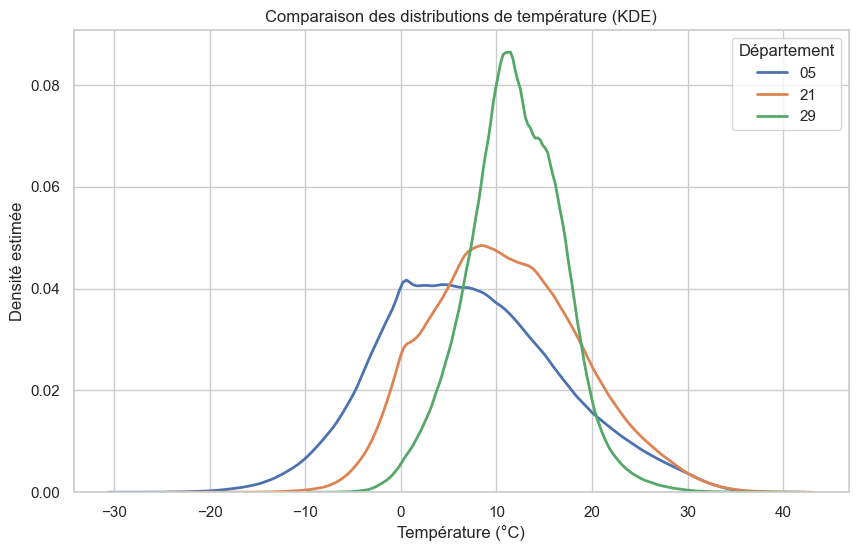

In [15]:
plt.figure(figsize=(10, 6))

sns.kdeplot(df_05.dropna(subset=["T"]), x="T", label="05", linewidth=2)
sns.kdeplot(df_21.dropna(subset=["T"]), x="T", label="21", linewidth=2)
sns.kdeplot(df_29.dropna(subset=["T"]), x="T", label="29", linewidth=2)

plt.title("Comparaison des distributions de température (KDE)")
plt.xlabel("Température (°C)")
plt.ylabel("Densité estimée")
plt.legend(title="Département")
plt.grid(True)
plt.show()

On peut déduire plusieurs choses de ces courbes :

* **Le 29 (Finistère)** a la distribution la plus centrée (autour de 10 °C) et la plus étroite : c’est le département le plus stable en température, avec peu d’écarts au fil de l’année.
* **Le 05 (Hautes-Alpes)** présente la distribution la plus étalée, allant de -20 °C à +30 °C. Cette variabilité, typique d’un climat de montagne, s’accompagne d’une densité plus aplatie : les extrêmes sont possibles mais peu fréquents.
* **Le 21 (Côte-d'Or)** a une étendue plus réduite que le 05, mais sa courbe reste haute sur une large plage de températures : cela traduit une plus grande fréquence des températures moyennes.

Cela confirme la lecture du graphique temporel et appuie les différences climatiques liées à la géographie : plus océanique à l’ouest, plus montagneux au sud-est, et plus continental au centre-est.

---

In [16]:
variables = ["U", "FF", "RR1", "N"]
labels = {
    "U": "Humidité relative (%)",
    "FF": "Vitesse du vent (m/s)",
    "RR1": "Précipitations (mm)",
    "N": "Nébulosité (octas)"
}

## Évolution mensuelle – Autres variables

On trace ici l’évolution mensuelle moyenne pour chaque variable (humidité, vent, précipitations, nébulosité) sur la période 2000–2025, pour chaque département.

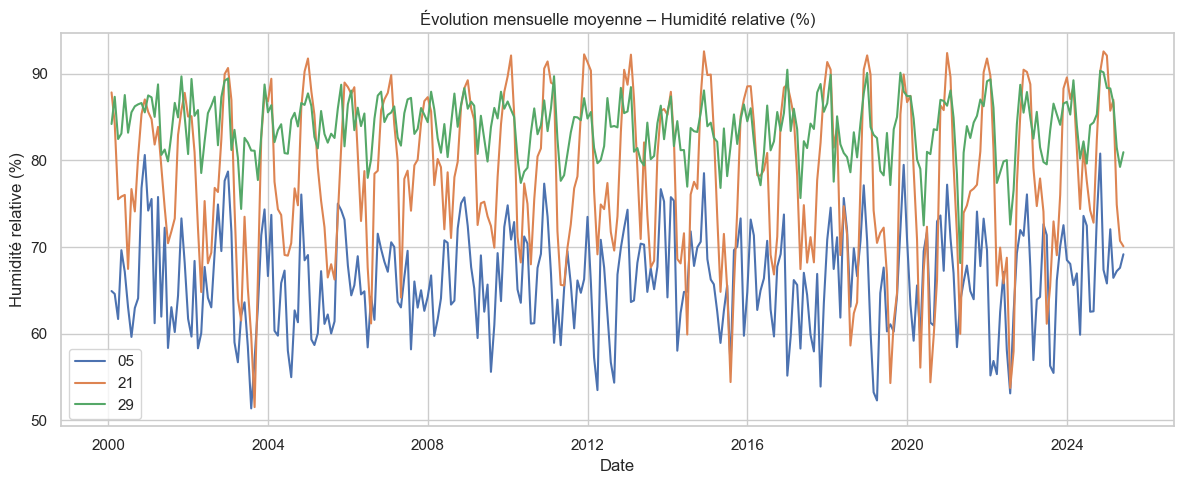

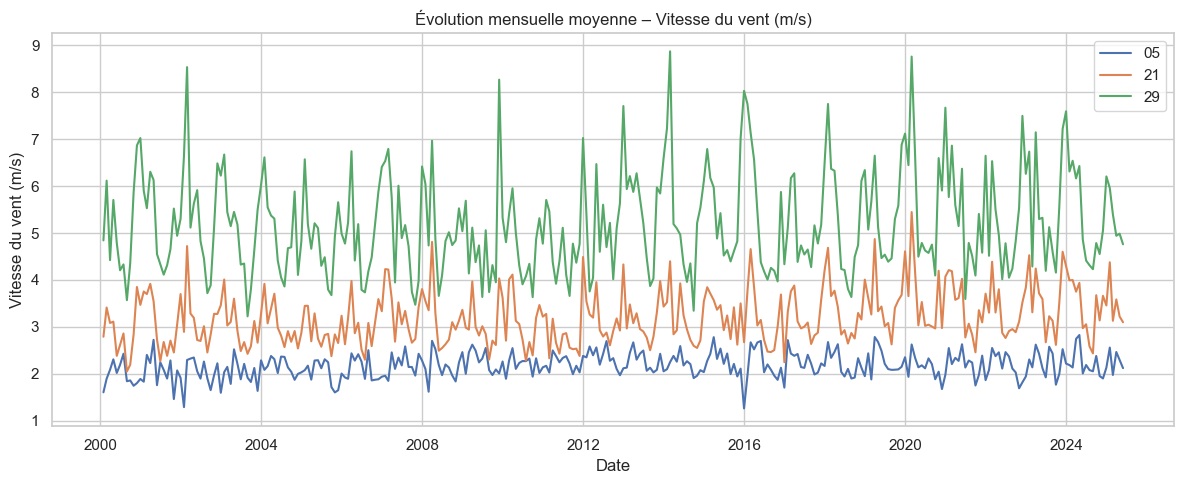

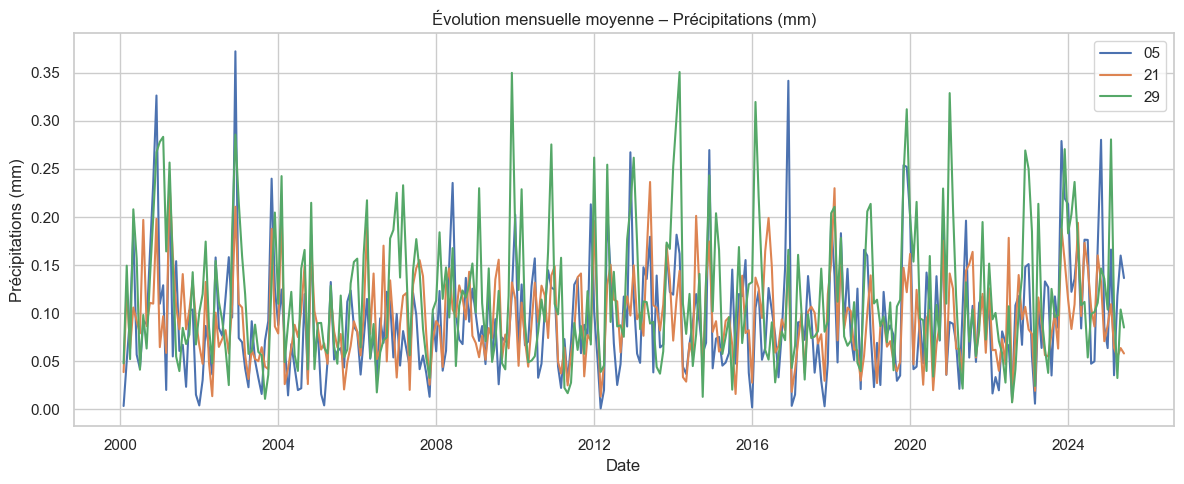

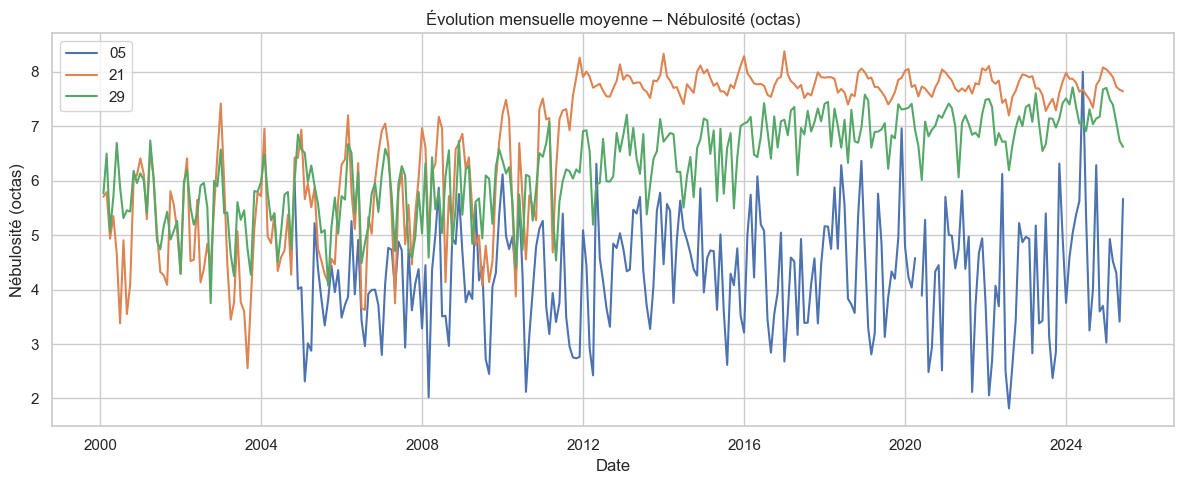

In [17]:
for var in variables:
    plt.figure(figsize=(12, 5))
    plt.plot(resample_mensuel(df_05, var), label="05")
    plt.plot(resample_mensuel(df_21, var), label="21")
    plt.plot(resample_mensuel(df_29, var), label="29")
    plt.title(f"Évolution mensuelle moyenne – {labels[var]}")
    plt.ylabel(labels[var])
    plt.xlabel("Date")
    plt.legend()
    plt.tight_layout()
    plt.grid(True)
    plt.show()

## Interprétation des évolutions mensuelles des variables météorologiques

Les graphiques ci-dessus présentent l’évolution mensuelle moyenne de plusieurs variables météorologiques (humidité relative, vitesse du vent, précipitations, nébulosité) pour les départements 05, 21 et 29 entre 2000 et 2025.

- **Humidité relative (%)** :  
  On observe une forte saisonnalité pour tous les départements, avec des pics d’humidité en hiver et des creux en été. Le département 21 présente une amplitude plus marquée, tandis que le 29 reste plus stable, ce qui est cohérent avec un climat océanique.

- **Vitesse du vent (m/s)** :  
  Le département 29 (Finistère) se distingue par des vitesses de vent nettement supérieures et plus variables, ce qui correspond à son exposition océanique. Les départements 05 et 21 présentent des vents plus faibles et plus réguliers.

- **Précipitations (mm)** :  
  Les précipitations sont très variables d’un mois à l’autre et d’un département à l’autre, sans tendance claire sur la période. Le 29 connaît cependant des pics plus fréquents, ce qui vient sans doute du fait que ce soit une région côtière.

- **Nébulosité (octas)** :  
  La nébulosité moyenne mensuelle montre des différences notables : le 21 présente des valeurs plus élevées et plus stables après 2012, ne descendant plus en dessous de 7 octas.  
  Cette évolution pourrait s’expliquer par la forte chute du nombre de mesures mensuelles observée à partir de 2006 (voir graphique ci-dessous). Cette chute du nombre d’échantillons pourrait biaiser la moyenne mensuelle et expliquer l’absence de valeurs basses après 2012 bien que ce soit peu probable puisque cette diminution intervient à partir de 2006 et non de 2012.  
  Mais il est également possible qu’un changement d’équipement ou de protocole de mesure soit à l’origine de cette rupture : nous n’avons pas pu en déterminer la cause exacte.

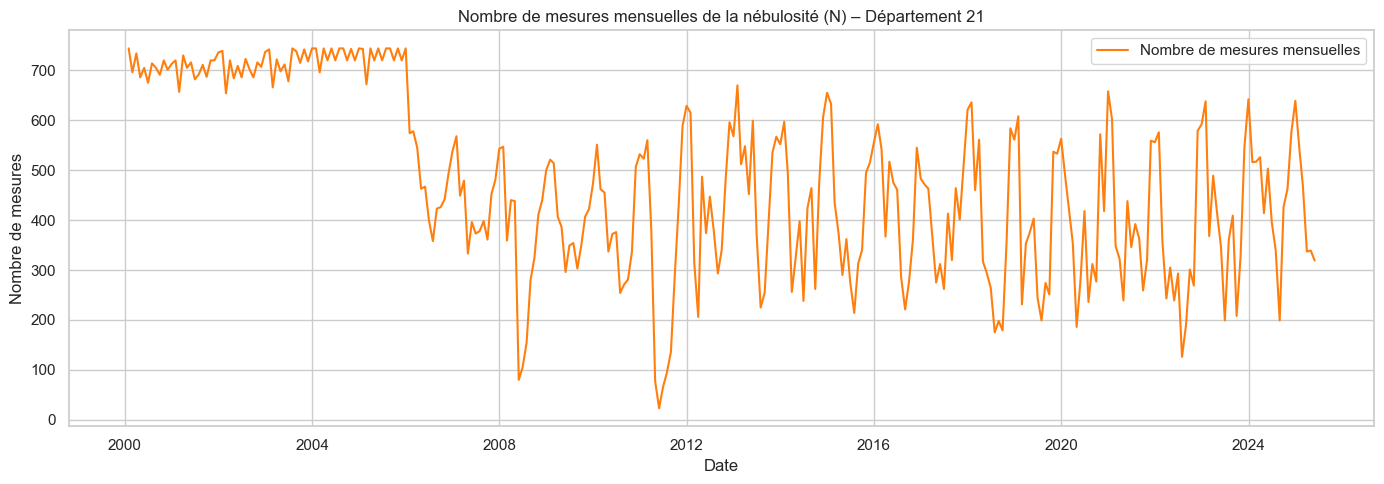

In [18]:
mensuel_nb_mesures = df_21.set_index("datetime")["N"].resample("ME").count()

plt.figure(figsize=(14, 5))
plt.plot(mensuel_nb_mesures, label="Nombre de mesures mensuelles", color="tab:orange")
plt.title("Nombre de mesures mensuelles de la nébulosité (N) – Département 21")
plt.xlabel("Date")
plt.ylabel("Nombre de mesures")
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.show()

---
## Comparaison des distributions – Autres variables (KDE)

On utilise une courbe KDE (Kernel Density Estimation) pour visualiser la distribution des valeurs de chaque variable, comparée entre départements. Cela permet de comprendre la dispersion et la concentration des phénomènes météo.

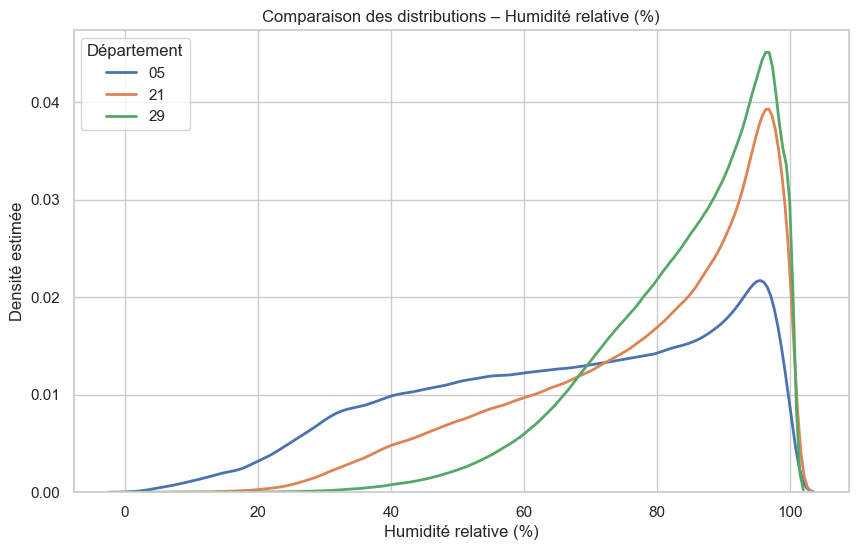

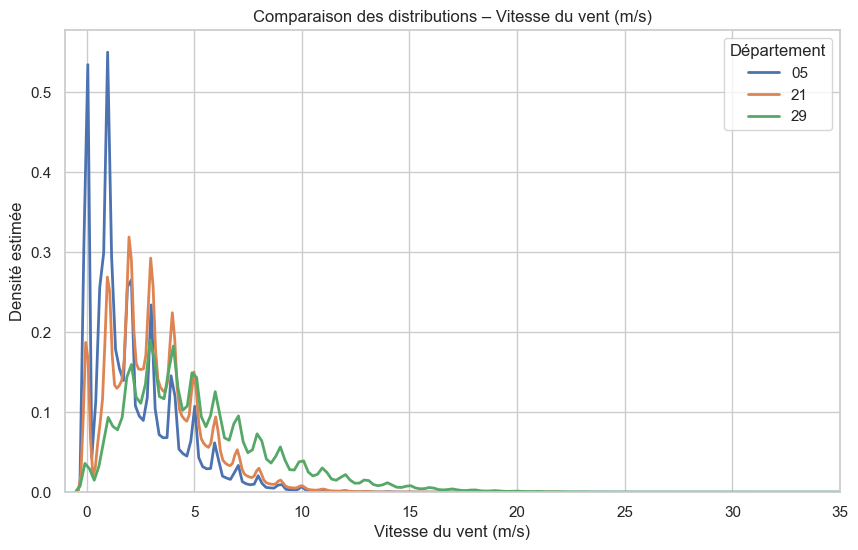

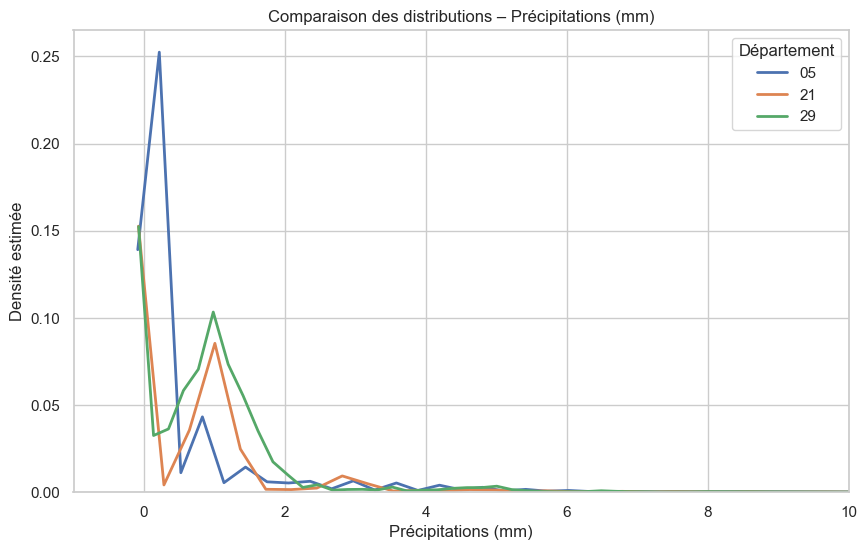

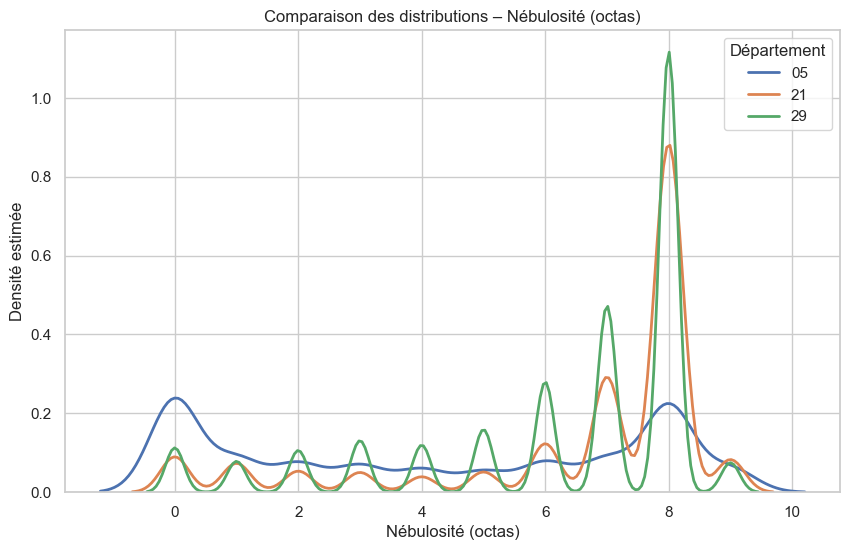

In [19]:
for var in variables:
    plt.figure(figsize=(10, 6))
    sns.kdeplot(df_05.dropna(subset=[var]), x=var, label="05", linewidth=2)
    sns.kdeplot(df_21.dropna(subset=[var]), x=var, label="21", linewidth=2)
    sns.kdeplot(df_29.dropna(subset=[var]), x=var, label="29", linewidth=2)

    plt.title(f"Comparaison des distributions – {labels[var]}")
    plt.xlabel(labels[var])
    plt.ylabel("Densité estimée")

    if var == "RR1":
        plt.xlim(-1, 10)
    elif var == "FF":
        plt.xlim(-1, 35)

    plt.legend(title="Département")
    plt.grid(True)
    plt.show()

## Interprétation des distributions (KDE) des variables météorologiques

Les graphiques KDE ci-dessus permettent de comparer la distribution des valeurs pour chaque variable entre les trois départements :

- **Humidité relative (%)** :  
  Le 29 présente une distribution très resserrée autour de 95–100 %, signe d’un air très humide toute l’année. Le 21 est également concentré sur les hautes valeurs, mais avec une légère dispersion. Le 05, en revanche, montre une distribution plus large, traduisant une plus grande variabilité de l’humidité, typique d’un climat montagnard.

- **Vitesse du vent (m/s)** :  
  Le 29 présente des vitesses de vent plus élevées en moyenne, puisque plus décalé vers la droite. Les départements 05 et 21 ont des vents plus faibles, concentrés autour de faibles vitesses (0 à 5 m/s), avec des gros pics autour de 0 m/s et 1-2 m/s pour le 05, sans doute dû aux reliefs de ce départment.

- **Précipitations (mm)** :  
  Les trois départements ont une majorité de valeurs proches de zéro, ce qui est logique puisqu'il ne pleut pas la plupart du temps. Le 29 présente le plus gros pique autour de 1mm, indiquant des épisodes pluvieux plus fréquents ou plus intenses, cohérent avec un climat océanique. Le 05 à lui le plus gros pic autour 0.25mm, ce qui correspond donc probablement aux précipitations de neige et qui est aussi cohérent avec le climat de se département.

- **Nébulosité (octas)** :  
  Le département 21 et le 29 présentent une forte concentration autour de 8 octas (ciel très couvert), tandis que le 05 montre une distribution plus étalée, avec une proportion non négligeable de valeurs basses (ciel dégagé). Cela traduit un climat plus souvent nuageux dans le 21 et le 29, et plus variable dans le 05.

Ces distributions confirment les différences climatiques régionales qu'on avait déja observé à l'aide des valeurs mensuelles moyennes ainsi que des graphiques KDE obserbé pour la température :  
- Le **29** (Finistère) est marqué par un climat océanique : temprérature stable, air humide, vents forts, précipitations fréquentes, nébulosité élevée.
- Le **05** (Hautes-Alpes) présente une grande variabilité, avec des périodes sèches, des vents faibles et une nébulosité plus variable.
- Le **21** (Côte-d’Or) se situe entre les deux, avec une humidité élevée, des vents modérés et une nébulosité souvent forte.

---